In [1]:
from src import Color
from src.material.material import create_phong_material
from src import World
from src import Sphere, Plane
from src import PointLight
from src import ipynb_display_image
from src import Resolution
from src import Camera
from src import Vertex, Vector
from src import Scene, RenderMethod, ShadingModel, QualityPreset

# Simple scene with a sphere and a plane and a light source
no skybox just to demonstrate basic functionality

In [2]:
# colors
brown = Color.custom_rgb(150, 75, 0)
red = Color.custom_rgb(255, 0, 0)

# materials
glossy_red = create_phong_material(name="glossy_red", base_color=red, spec_color=Color.custom_rgb(255, 255, 255), shininess=100, ior=1.0, reflectivity=0.3, transparency=0.0)
mate_blue = create_phong_material(name="mate_blue", base_color=Color.custom_rgb(0, 0, 255), spec_color=Color.custom_rgb(128, 128, 128), shininess=10, ior=1.0, reflectivity=0.05, transparency=0.0)

# objects
sphere = Sphere(center=Vertex(0, 0.2, -5), radius=1.0, material=glossy_red)
plane = Plane(point=Vertex(0, -1, 0), normal=Vector(0, 1, 0), material=mate_blue)

# world
world = World()
world.add(sphere)
world.add(plane)

# lights
point_light = PointLight(position=Vertex(5, 5, 0), intensity=2000.0, falloff=0.01)

# scene setup
camera = Camera(
    fov = 40,
    resolution = Resolution.R360p,
    origin = Vertex(0, 0, 0),
    direction = Vector(0, 0, -1),
)

scene = Scene(
    camera = camera,
    world = world,
    lights = [point_light],
    skybox_path = None
)

scene.validate()

Scene validation passed.


# Now we can render the scene

### Preview

Rendering preview at resolution Resolution.R360p with FOV 40


Preview render took 28.38 seconds


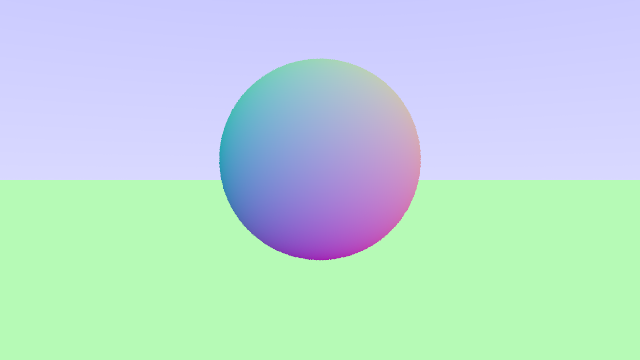

'./images/preview.png'

In [3]:
#prewiew render with no antialiasing, no recursion and no skybox at 144p resolution for speed just to see all objects in the scene
scene.render_preview()

Render

Phong render saved to images/helloworld.png


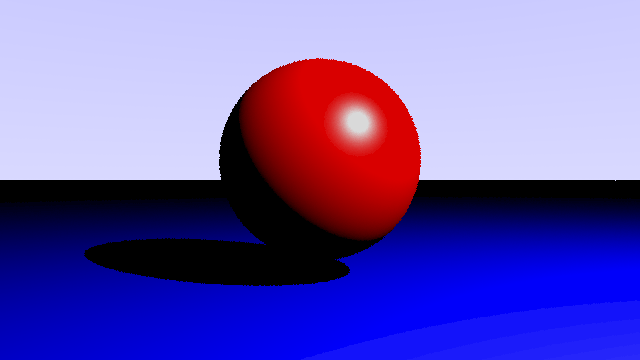

In [4]:
#set your desired resolution here
scene.set_camera_resolution(Resolution.R360p)

# render it
png = scene.render(
    shading_model = ShadingModel.BLINN_PHONG,
    render_method= RenderMethod.SHADOW_TRACE,
    quality = QualityPreset.LOW,
    image_png_path = "./images/helloworld.png"
)

# display in the notebook
ipynb_display_image(png)

Using skybox: None
Rendering fast at resolution Resolution.R360p with FOV 40 and samples_per_pixel=1, max_depth=3
No progress bar in multithreaded mode - switch to other render method for that if needed - this is supposed to be fast!
------------------------------------------------------------
Using 8 CPU cores for rendering.
------------------------------------------------------------
Fast render saved to images/helloworld_faster.png


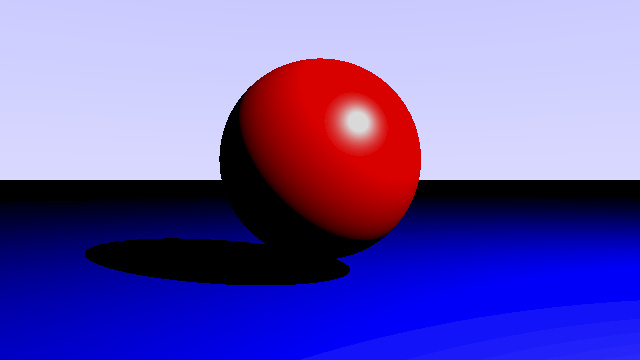

In [5]:
 # faster renderer with same settings
png = scene.render(
    shading_model = ShadingModel.BLINN_PHONG,
    render_method= RenderMethod.SHADOW_TRACE_MULTITHREADED,
    quality = QualityPreset.LOW,
    image_png_path = "./images/helloworld_faster.png"
)
ipynb_display_image(png)